In [3]:
from ZDRC_CALCULATOR_QJ_2025.zdr_column_code.composite_calculator import polar_to_cartesian_composite

from ZDRC_CALCULATOR_QJ_2025.zdr_column_code.zdrc_height_calculator import calculate_zdr_column_height
from ZDRC_CALCULATOR_QJ_2025.util.util import load_paths_and_configs

import numpy as np
import matplotlib.pyplot as plt
paths, shared_dicts, zdrc_algorithm_config = load_paths_and_configs()

%load_ext autoreload

In [4]:
# calculating the ZDR composite.


timestamp = "211791432"

# THIS DOES NOT WORK FOR YOU BECAUSE SOME DATA IS PROPRIETARY. We have saved an example output which can be loaded below.

# composite = polar_to_cartesian_composite(
#     timestamp=timestamp, zdr_config="config_zdrc_publication_version"
# )


# np.savez_compressed(
#     f"{paths['COMPOSITE_DIRECTORY']}/{timestamp}_zdr_grid_unfiltered.npz",
#     array1=composite,
# )

In [5]:
composite = np.load(
    f"{paths['COMPOSITE_DIRECTORY']}/{timestamp}_zdr_grid_unfiltered.npz"
)["array1"]

In [6]:
# calculating the ZDRC height field

zdr_column_height, max_zdr_value_in_column = calculate_zdr_column_height(
    timestamp=timestamp,
    zdr_composite=composite,
    zdr_config="config_zdrc_publication_version",
)

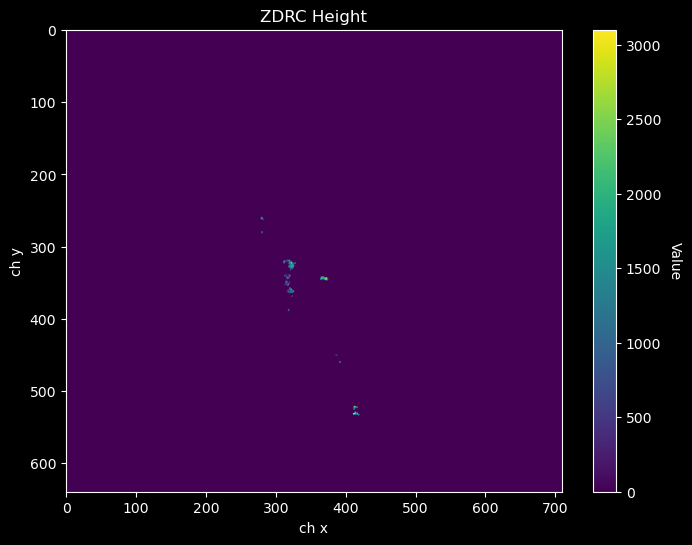

In [7]:
# Plot the ZDRC height

plot_grid = np.flipud(zdr_column_height)

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(plot_grid, cmap="viridis", aspect="auto")

# Add color bar
cbar = fig.colorbar(cax, ax=ax)
cbar.set_label("Value", rotation=270, labelpad=15)

# Set title and labels
ax.set_title("ZDRC Height")
ax.set_xlabel("ch x")
ax.set_ylabel("ch y")

plt.show()